
let's start with TensorFlow.


---


In this collab, we are goig to solve three problems, and create thre different neuronal nets.


## First Sample. The most simple problem to solve 

---




In [1]:
#First steep is import the libraries. 
import tensorflow as tf
#Numpy is a lybrary that allow us to work with arrays. 
import numpy as np
#keras is an open source neural networks lybrary writted in python that run's in varios frameworks, TensorFlow included. 
from tensorflow import keras
print (tf.__version__)


2.8.2


In [3]:
#create 2 arrays, and the model must discover the relationship betwen the values. 
# (n * -1) + 2
X = np.array([-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype=float)
y = np.array([4.0, 3.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0], dtype=float)

In [2]:
#Model with just one dense layer, one neuron, and one input. This is the most simple model possible. 
model = tf.keras.Sequential(keras.layers.Dense(units=1, input_shape=[1]))


In [4]:
#compile and train the model.
#compile and indicate the optimezer and the model. By the moment we need to understand that this both functions are where the magic happens. 
#The optimizer is the function responsible to make a guess. 
#The loss function is responsible to indicate how accurated the guees is. 
#They try to be more accurated in each epoch
model.compile(optimizer="sgd", loss="mean_squared_error") 
model.fit(X, y, epochs=250)

Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 84.9895
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 33.3862
Epoch 3/250
1/1 [==============================] - 0s 8ms/step - loss: 14.1327
Epoch 4/250
1/1 [==============================] - 0s 11ms/step - loss: 6.9275
Epoch 5/250
1/1 [==============================] - 0s 10ms/step - loss: 4.2102
Epoch 6/250
1/1 [==============================] - 0s 8ms/step - loss: 3.1649
Epoch 7/250
1/1 [==============================] - 0s 9ms/step - loss: 2.7430
Epoch 8/250
1/1 [==============================] - 0s 10ms/step - loss: 2.5539
Epoch 9/250
1/1 [==============================] - 0s 7ms/step - loss: 2.4522
Epoch 10/250
1/1 [==============================] - 0s 8ms/step - loss: 2.3837
Epoch 11/250
1/1 [==============================] - 0s 9ms/step - loss: 2.3282
Epoch 12/250
1/1 [==============================] - 0s 8ms/step - loss: 2.2781
Epoch 13/250
1/1 [==============================] - 0s 7

In [5]:
#expect something near -8. 
print(model.predict([10.0]))

[[-7.890001]]


# Working with Images
Dataset:
This dataset is really common and used in a los of samples and tutorials. 
https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

References: 

This is an amazing article, using Keras, but not with Tensorflow. I got a lot of information and inspiration from this articles. For sure that anyone able to follow this course can understand and get ideas. 

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

Maybe the best introduction to Machine Learning with tensorflow is the list from Laurence Moroney available in youtube. I get a lot from the video number 5, to create this sample. 
https://www.youtube.com/watch?v=nq7_ZYJPWf0&t=5s


As you can see all the aproches are similar, but not the same. Is easy to copy one model who works with the same dataset, but you must understand what are you doing and experiment by yourself. 

In [6]:
#First step is import the libraries. 
import tensorflow as tf
#Numpy is a lybrary that allow us to work with arrays. 
import numpy as np
#keras is an open source neural networks lybrary writted in python that run's in varios frameworks, TensorFlow included. 
from tensorflow import keras
from time import time

print (tf.__version__)


2.8.2


In [7]:
#obtain the data from microsoft.com
#the same dataset is available in kaggle but with a different organization
#https://www.kaggle.com/competitions/dogs-vs-cats/data

!wget --no-check-certificate \
https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip \-O /tmp/catsvsdogs.zip



--2022-07-13 15:26:07--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.117.232.107, 2600:1409:3000:4a4::e59, 2600:1409:3000:48e::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.117.232.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/catsvsdogs.zip’

/tmp/catsvsdogs.zip 100%[===================>] 786.67M   197MB/s    in 4.3s    

2022-07-13 15:26:11 (183 MB/s) - ‘/tmp/catsvsdogs.zip’ saved [824887076/824887076]



In [8]:
#unzip the data
import zipfile
cvr_zip_file = '/tmp/catsvsdogs.zip'
zipmem = zipfile.ZipFile(cvr_zip_file)
zipmem.extractall('/tmp/catsvsdogs')
zipmem.close()



In [9]:
#create the directory structure
import os

#we need a try block, because it fails when the directories already exist. 
try:
  os.mkdir('/tmp/datacvd')
  os.mkdir('/tmp/datacvd/train')
  os.mkdir('/tmp/datacvd/validation')
  os.mkdir('/tmp/datacvd/train/cats')
  os.mkdir('/tmp/datacvd/train/dogs')
  os.mkdir('/tmp/datacvd/validation/cats')
  os.mkdir('/tmp/datacvd/validation/dogs')
except:
  pass

In [11]:
#we need 4 datasets, two for training the model and two for validate or test the model. 
#to classify the images in this dataset we can move it from their original directories to 
#a new ones with the correct structure. 

from shutil import copyfile

#this array contents all the images to move/copy
imagesCats=[]
imagesDogs=[]

for imagename in os.listdir('/tmp/catsvsdogs/PetImages/Cat/'):
  imageCat = '/tmp/catsvsdogs/PetImages/Cat/' + imagename
  if (os.path.getsize(imageCat)) > 0:
    imagesCats.append(imagename)


for imagename in os.listdir('/tmp/catsvsdogs/PetImages/Dog/'):
  imageDog = '/tmp/catsvsdogs/PetImages/Dog/' + imagename
  if (os.path.getsize(imageDog)) > 0:
    imagesDogs.append(imagename)




counterImage = 0
for imagename in imagesCats:
  if  counterImage < 2000:
    copyfile('/tmp/catsvsdogs/PetImages/Cat/' + imagename, '/tmp/datacvd/validation/cats/'+imagename)
  else:
    copyfile('/tmp/catsvsdogs/PetImages/Cat/' + imagename, '/tmp/datacvd/train/cats/'+imagename)
  counterImage +=1

counterImage = 0
for imagename in imagesDogs:
  if  counterImage < 2000:
    copyfile('/tmp/catsvsdogs/PetImages/Dog/' + imagename, '/tmp/datacvd/validation/dogs/'+imagename)
  else:
    copyfile('/tmp/catsvsdogs/PetImages/Dog/' + imagename, '/tmp/datacvd/train/dogs/'+imagename)
  counterImage +=1

print(len(os.listdir('/tmp/datacvd/validation/dogs/')))
print(len(os.listdir('/tmp/datacvd/train/dogs/')))
print(len(os.listdir('/tmp/datacvd/validation/cats/')))
print(len(os.listdir('/tmp/datacvd/train/cats/')))


2000
10500
2000
10500


In [12]:
#create the model
#it's a minimal model for images, with just an Convolutionatl layer and a MaxPooling layer
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 147, 147, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 85264)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               10913920  
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,914,833
Trainable params: 10,914,833
Non-trainable params: 0
__________________________________________

In [14]:
 #create the model2
#a model with more convutionals and Pooling layers obtains leess parameters. 
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Conv2D(32, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Conv2D(64, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(512, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [15]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      784       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)      

In [16]:
#compile models 
from tensorflow.keras.optimizers import RMSprop
#binary_crossentropy is a loss function that works really weel with binary clasifications. 
model.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])
model2.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [17]:
#preparing the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#TRAIN Dataset
#Normalize the images
train_idg = ImageDataGenerator(rescale=1/255)
train_data = train_idg.flow_from_directory(
    '/tmp/datacvd/train', 
    target_size = (150, 150), 
    batch_size = 105, 
    class_mode='binary'
)
#VALIDATION Dataset
val_idg = ImageDataGenerator(rescale=1/255)
val_data = val_idg.flow_from_directory(
    '/tmp/datacvd/validation', 
    target_size = (150, 150), 
    batch_size = 100, 
    class_mode='binary'
)

Found 20998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [18]:
#Training the model
#epochs * steps_per_epoch * batch_size

history = model.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)

Epoch 1/15
 46/100 [============>.................] - ETA: 15s - loss: 2.9252 - accuracy: 0.5159

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 45s 353ms/step - loss: 1.7152 - accuracy: 0.5545 - val_loss: 0.6315 - val_accuracy: 0.6725
Epoch 2/15
100/100 [==============================] - 35s 348ms/step - loss: 0.6142 - accuracy: 0.6817 - val_loss: 0.5638 - val_accuracy: 0.7110
Epoch 3/15
100/100 [==============================] - 35s 347ms/step - loss: 0.5497 - accuracy: 0.7311 - val_loss: 0.5447 - val_accuracy: 0.7235
Epoch 4/15
100/100 [==============================] - 35s 346ms/step - loss: 0.4950 - accuracy: 0.7610 - val_loss: 0.5501 - val_accuracy: 0.7235
Epoch 5/15
100/100 [==============================] - 34s 345ms/step - loss: 0.4554 - accuracy: 0.7914 - val_loss: 0.5213 - val_accuracy: 0.7505
Epoch 6/15
100/100 [==============================] - 34s 345ms/step - loss: 0.4058 - accuracy: 0.8232 - val_loss: 0.5291 - val_accuracy: 0.7490
Epoch 7/15
100/100 [==============================] - 35s 347ms/step - loss: 0.3581 - accuracy: 0.8487 - val_loss: 0.5391 - val_accuracy: 0.7

In [19]:
#Training the model2
history2 = model2.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)

Epoch 1/15
 58/100 [================>.............] - ETA: 12s - loss: 0.9915 - accuracy: 0.5300

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 37s 362ms/step - loss: 0.8763 - accuracy: 0.5475 - val_loss: 0.7055 - val_accuracy: 0.5090
Epoch 2/15
100/100 [==============================] - 35s 352ms/step - loss: 0.6381 - accuracy: 0.6432 - val_loss: 0.5740 - val_accuracy: 0.7000
Epoch 3/15
100/100 [==============================] - 35s 349ms/step - loss: 0.5691 - accuracy: 0.7016 - val_loss: 0.5192 - val_accuracy: 0.7440
Epoch 4/15
100/100 [==============================] - 38s 379ms/step - loss: 0.5363 - accuracy: 0.7347 - val_loss: 0.9325 - val_accuracy: 0.5480
Epoch 5/15
100/100 [==============================] - 35s 346ms/step - loss: 0.5055 - accuracy: 0.7572 - val_loss: 0.4928 - val_accuracy: 0.7755
Epoch 6/15
100/100 [==============================] - 35s 354ms/step - loss: 0.4561 - accuracy: 0.7885 - val_loss: 0.4502 - val_accuracy: 0.7850
Epoch 7/15
100/100 [==============================] - 35s 346ms/step - loss: 0.4164 - accuracy: 0.8098 - val_loss: 0.4330 - val_accuracy: 0.7

<Figure size 432x288 with 0 Axes>

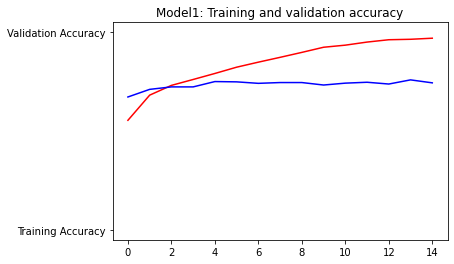

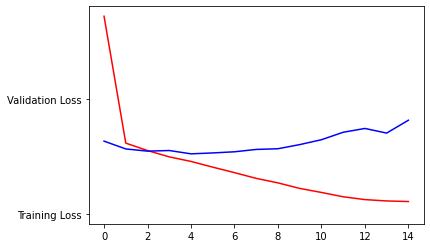

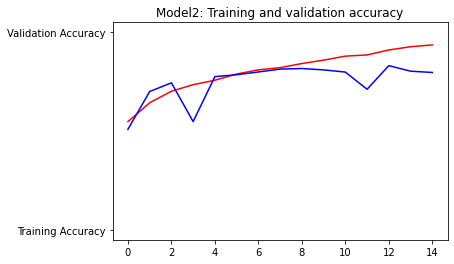

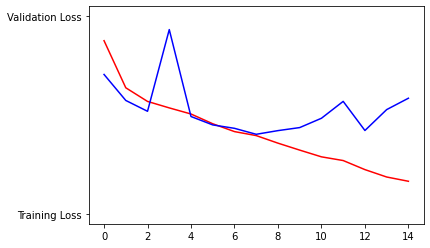

<Figure size 432x288 with 0 Axes>

In [20]:
%matplotlib inline
 
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

acc2=history2.history['accuracy']
val_acc2=history2.history['val_accuracy']
loss2=history2.history['loss']
val_loss2=history2.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Model1: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

plt.plot(epochs, acc2, 'r', "Training Accuracy")
plt.plot(epochs, val_acc2, 'b', "Validation Accuracy")
plt.title('Model2: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss2, 'r', "Training Loss")
plt.plot(epochs, val_loss2, 'b', "Validation Loss")
plt.figure()



## Solve OVERFITTING with Image Augmentation
Image augmentation add variations to the images reducing the overfitting. 





In [21]:
#preparing the images but using random movements to obtain images from 
#image augmentation applied only to train data generator. 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#TRAIN Dataset
#Normalize the images
train_idg = ImageDataGenerator(rescale=1/255, 
                               rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.2, 
                               zoom_range=0.1, 
                               horizontal_flip=True)
train_data = train_idg.flow_from_directory(
    '/tmp/datacvd/train', 
    target_size = (150, 150), 
    batch_size = 105, 
    class_mode='binary'
)
#VALIDATION Dataset
val_idg = ImageDataGenerator(rescale=1/255)
val_data = val_idg.flow_from_directory(
    '/tmp/datacvd/validation', 
    target_size = (150, 150), 
    batch_size = 100, 
    class_mode='binary'
)

Found 20998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [22]:
#Training the model
#with the new imagegenerator

history = model.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)

Epoch 1/15
 66/100 [==================>...........] - ETA: 24s - loss: 0.6513 - accuracy: 0.7004

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 79s 786ms/step - loss: 0.6280 - accuracy: 0.7010 - val_loss: 0.5388 - val_accuracy: 0.7525
Epoch 2/15
100/100 [==============================] - 77s 768ms/step - loss: 0.5751 - accuracy: 0.7150 - val_loss: 0.5653 - val_accuracy: 0.7160
Epoch 3/15
100/100 [==============================] - 76s 764ms/step - loss: 0.5545 - accuracy: 0.7239 - val_loss: 0.5498 - val_accuracy: 0.7275
Epoch 4/15
100/100 [==============================] - 77s 766ms/step - loss: 0.5489 - accuracy: 0.7256 - val_loss: 0.5592 - val_accuracy: 0.7210
Epoch 5/15
100/100 [==============================] - 77s 765ms/step - loss: 0.5567 - accuracy: 0.7166 - val_loss: 0.4857 - val_accuracy: 0.7595
Epoch 6/15
100/100 [==============================] - 77s 767ms/step - loss: 0.5479 - accuracy: 0.7342 - val_loss: 0.4841 - val_accuracy: 0.7620
Epoch 7/15
100/100 [==============================] - 77s 766ms/step - loss: 0.5418 - accuracy: 0.7270 - val_loss: 0.5062 - val_accuracy: 0.7

In [24]:
#Traning the model2
history2 = model2.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)

Epoch 1/15
100/100 [==============================] - 77s 775ms/step - loss: 0.4735 - accuracy: 0.7835 - val_loss: 0.3888 - val_accuracy: 0.8225
Epoch 2/15
100/100 [==============================] - 77s 768ms/step - loss: 0.4451 - accuracy: 0.7941 - val_loss: 0.3800 - val_accuracy: 0.8350
Epoch 3/15
100/100 [==============================] - 77s 770ms/step - loss: 0.4263 - accuracy: 0.8068 - val_loss: 0.3531 - val_accuracy: 0.8505
Epoch 4/15
100/100 [==============================] - 77s 769ms/step - loss: 0.4135 - accuracy: 0.8136 - val_loss: 0.3479 - val_accuracy: 0.8520
Epoch 5/15
 27/100 [=======>......................] - ETA: 51s - loss: 0.4202 - accuracy: 0.8162

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 77s 770ms/step - loss: 0.4074 - accuracy: 0.8188 - val_loss: 0.3395 - val_accuracy: 0.8535
Epoch 6/15
100/100 [==============================] - 77s 771ms/step - loss: 0.3931 - accuracy: 0.8237 - val_loss: 0.3454 - val_accuracy: 0.8540
Epoch 7/15
100/100 [==============================] - 77s 771ms/step - loss: 0.3832 - accuracy: 0.8281 - val_loss: 0.4057 - val_accuracy: 0.8040
Epoch 8/15
100/100 [==============================] - 77s 771ms/step - loss: 0.3903 - accuracy: 0.8216 - val_loss: 0.3255 - val_accuracy: 0.8585
Epoch 9/15
100/100 [==============================] - 77s 766ms/step - loss: 0.3866 - accuracy: 0.8272 - val_loss: 0.2893 - val_accuracy: 0.8680
Epoch 10/15
100/100 [==============================] - 77s 767ms/step - loss: 0.3728 - accuracy: 0.8341 - val_loss: 0.2830 - val_accuracy: 0.8755
Epoch 11/15
100/100 [==============================] - 77s 769ms/step - loss: 0.3651 - accuracy: 0.8366 - val_loss: 0.3835 - val_accuracy: 0

<Figure size 432x288 with 0 Axes>

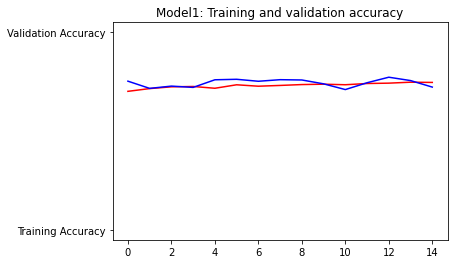

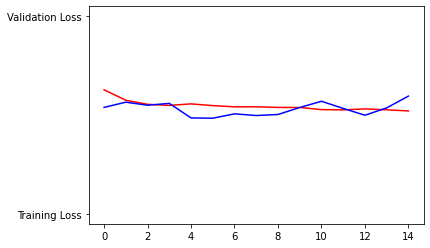

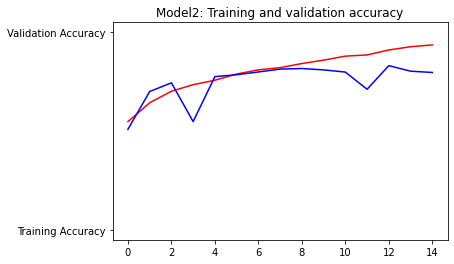

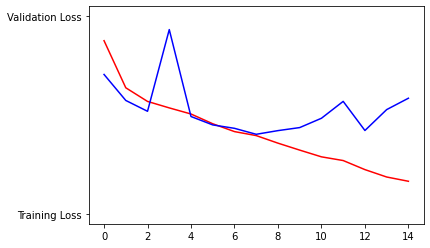

<Figure size 432x288 with 0 Axes>

In [23]:
%matplotlib inline
 
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

acc2=history2.history['accuracy']
val_acc2=history2.history['val_accuracy']
loss2=history2.history['loss']
val_loss2=history2.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Model1: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

plt.plot(epochs, acc2, 'r', "Training Accuracy")
plt.plot(epochs, val_acc2, 'b', "Validation Accuracy")
plt.title('Model2: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss2, 'r', "Training Loss")
plt.plot(epochs, val_loss2, 'b', "Validation Loss")
plt.figure()

### Add a some dropout layers to the models
A dropout layer can help with the overfitting reducing the amount of information in every image. 

In [ ]:
#create the model with a dropout layer. 
#it's a minimal model for images, with just an Convolutionatl layer and a MaxPooling layer
modelDrop1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Dropout(0.5), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
 #create the model with dropouts layers. 
#a model with more convutionals and Pooling layers obtains leess parameters. 
modelDrop2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),   
  tf.keras.layers.Conv2D(32, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Conv2D(64, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Dropout(0.5), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(512, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
#compile the dropout models 
from tensorflow.keras.optimizers import RMSprop
#binary_crossentropy is a loss function that works really weel with binary clasifications. 
modelDrop1.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])
modelDrop2.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [ ]:
#Training the model
#with the new imagegenerator

historyDrop = modelDrop1.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 1.1276 - accuracy: 0.5413

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 78s 776ms/step - loss: 1.1276 - accuracy: 0.5413 - val_loss: 0.6457 - val_accuracy: 0.6430
Epoch 2/15
100/100 [==============================] - 77s 765ms/step - loss: 0.6527 - accuracy: 0.6235 - val_loss: 0.6968 - val_accuracy: 0.5570
Epoch 3/15
100/100 [==============================] - 77s 772ms/step - loss: 0.6271 - accuracy: 0.6496 - val_loss: 0.5681 - val_accuracy: 0.7230
Epoch 4/15
100/100 [==============================] - 77s 768ms/step - loss: 0.6089 - accuracy: 0.6741 - val_loss: 0.5576 - val_accuracy: 0.7255
Epoch 5/15
100/100 [==============================] - 77s 768ms/step - loss: 0.6032 - accuracy: 0.6795 - val_loss: 0.5777 - val_accuracy: 0.6820
Epoch 6/15
100/100 [==============================] - 77s 773ms/step - loss: 0.5796 - accuracy: 0.6953 - val_loss: 0.5215 - val_accuracy: 0.7475
Epoch 7/15
100/100 [==============================] - 76s 765ms/step - loss: 0.5725 - accuracy: 0.6989 - val_loss: 0.5777 - val_accuracy: 0.6

In [ ]:
#Trianing the model2
start = time()
historyDrop2 = model2.fit(
     train_data,
     validation_data = val_data, 
     epochs=15,
     steps_per_epoch=100,
     validation_steps=20,
     verbose=1)
print (time()-start)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.3556 - accuracy: 0.8462

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 78s 778ms/step - loss: 0.3556 - accuracy: 0.8462 - val_loss: 0.3307 - val_accuracy: 0.8570
Epoch 2/15
100/100 [==============================] - 77s 772ms/step - loss: 0.3426 - accuracy: 0.8539 - val_loss: 0.2883 - val_accuracy: 0.8780
Epoch 3/15
100/100 [==============================] - 84s 844ms/step - loss: 0.3586 - accuracy: 0.8410 - val_loss: 0.3075 - val_accuracy: 0.8760
Epoch 4/15
100/100 [==============================] - 80s 793ms/step - loss: 0.3405 - accuracy: 0.8514 - val_loss: 0.2904 - val_accuracy: 0.8770
Epoch 5/15
100/100 [==============================] - 78s 775ms/step - loss: 0.3368 - accuracy: 0.8559 - val_loss: 0.2961 - val_accuracy: 0.8815
Epoch 6/15
100/100 [==============================] - 78s 781ms/step - loss: 0.3359 - accuracy: 0.8571 - val_loss: 0.4564 - val_accuracy: 0.7920
Epoch 7/15
100/100 [==============================] - 77s 775ms/step - loss: 0.3289 - accuracy: 0.8611 - val_loss: 0.4597 - val_accuracy: 0.8

<Figure size 432x288 with 0 Axes>

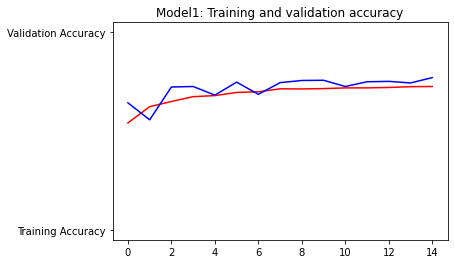

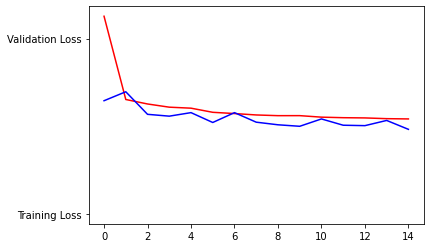

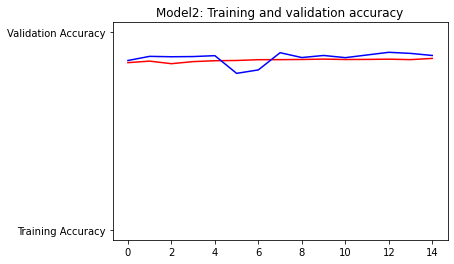

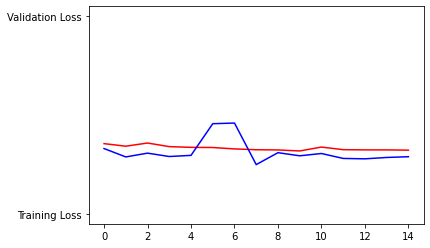

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
 
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=historyDrop.history['accuracy']
val_acc=historyDrop.history['val_accuracy']
loss=historyDrop.history['loss']
val_loss=historyDrop.history['val_loss']

acc2=historyDrop2.history['accuracy']
val_acc2=historyDrop2.history['val_accuracy']
loss2=historyDrop2.history['loss']
val_loss2=historyDrop2.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Model1: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

plt.plot(epochs, acc2, 'r', "Training Accuracy")
plt.plot(epochs, val_acc2, 'b', "Validation Accuracy")
plt.title('Model2: Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss2, 'r', "Training Loss")
plt.plot(epochs, val_loss2, 'b', "Validation Loss")
plt.figure()